# Ford GoBike Users and Rides
## by Amgad Elfeki

## Investigation Overview

In this ivestegation, we will be taking a look at the characteristics of the people who use Ford's GoBike and the trips made. The data in this ivestigation was provided by Ford Company.
## Dataset Overview

The data provided by Ford included information about the stations used by the company, information about the users such as birth year, gender indentity and users type and information about the trips such as trip duration and dates

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
# Creating a new column for users' age. We considered their age during the year 2020
gobike['member_age'] = 2020 - gobike['member_birth_year']

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Average Trip Duration

Average trips duration take from 1 minute upto 300 minutes, and most of the trips take about 9 minutes.<br>
The below plot shows the distribution of the trips' duration made by Ford's GoBike users.


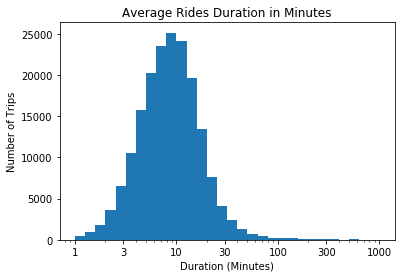

In [5]:
# Converting the the seconds into minutes
gobike['duration_min']=gobike['duration_sec']/60
#Log transforming to better understand the data
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = gobike , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('Average Rides Duration in Minutes');
plt.ylabel('Number of Trips');

## Users' Genders

In our next analysiswq, we look at which gender group uses the bike service the most. As it is shown below, we conclude that most of the users are males forming more than 70% of the total users.

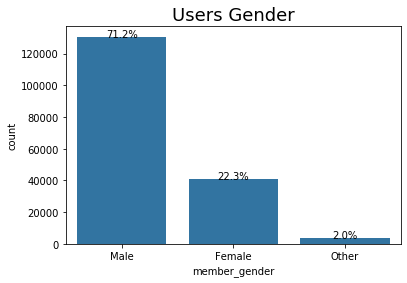

In [6]:
# Unifying the color of the plot
base_color = sb.color_palette()[0]
# Ordering the values index for a better visualization
freq = gobike['member_gender'].value_counts().index

sb.countplot(data=gobike, x='member_gender', color=base_color, order=freq);
plt.title('Users Gender', fontsize = 18);

type_counts = gobike['member_gender'].value_counts()

locs, labels = plt.xticks() 

# loop through each pair of locations to add the percentage
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/(gobike.shape[0]))
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

## Subscribers VS. Customers

Here we wanted to see the gender that dominates the subscribers list. As expected from the previous plot, the most of the subscribers are males and they form more than 60% of the whole susbcribers' population.<br>
Surprisingly, the ratio between males and females within the users who are not subscribed is not as big as the one within the subscribers.


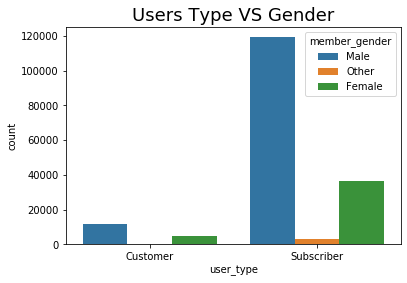

In [7]:
sb.countplot(data = gobike, x = 'user_type', hue = 'member_gender');
plt.title('Users Type VS Gender', fontsize = 18);

## Trip Duration Vs. Age

We wanted to check if the age of the riders impact the duration of the trips. Unsurprisingly, it was noted that the longest trips are made by those round the age range of 30's, and this duration decrease by increasing the age.

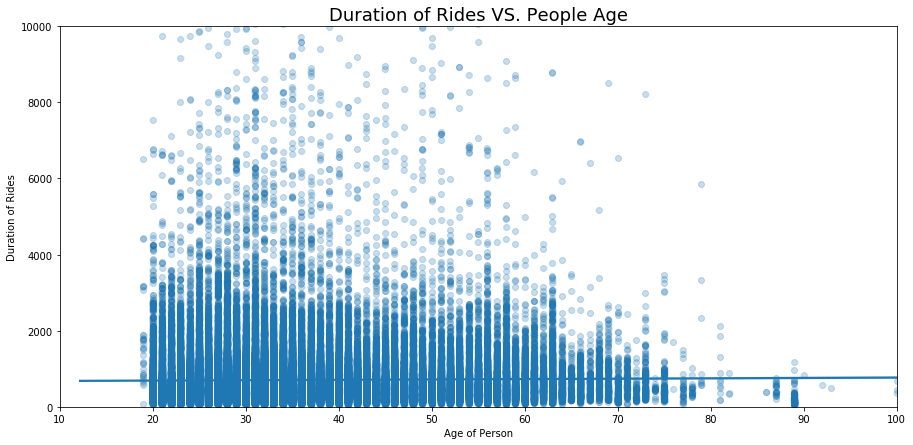

In [8]:
#Visualizing the data in a scatterplot
plt.figure(figsize = (15, 7))
plt.scatter(data = gobike, x = 'member_age', y = 'duration_sec', alpha = 0.2);
sb.regplot(data = gobike, x = 'member_age', y = 'duration_sec', truncate=False, x_jitter=0.1, scatter_kws={'alpha':1/20});
plt.title('Duration of Rides VS. People Age', fontsize = 18);
plt.xlabel('Age of Person');
plt.ylabel('Duration of Rides');
plt.xlim(10, 100);
plt.ylim(0, 10000);

## Ride Duration Across Users' Types and Age

We checked if the users' types and age have infuelnce on the trips' duration. As we concluded before, the trips are longest among those in their 30's. However, it came to our note that the longest trips are made by users who are note subscribed to the service, which requires more digging to find the reason behind that and come up with strategies to increase the subscription rate among this group of people.

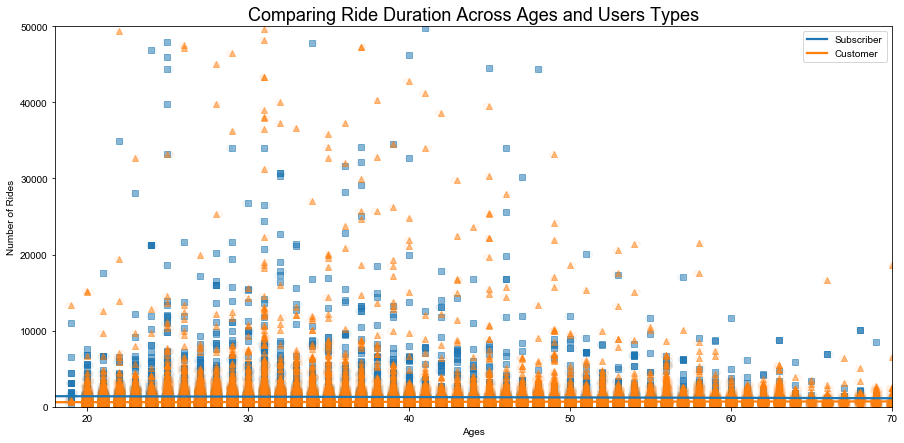

In [9]:
#Visualizing the data in an adapted scatterplot with a sample size of 250000 records
plt.figure(figsize = (15,7))

cat_markers = [['Customer', 's'],
               ['Subscriber', '^']]

for cat, marker in cat_markers:
    df_usertype = gobike[gobike['user_type'] == cat]
    plt.scatter(data = df_usertype, x = 'member_age', y = 'duration_sec', marker = marker, alpha = 0.5);
    sb.regplot(data = df_usertype, x = 'member_age', y = 'duration_sec', truncate=False, x_jitter=0.2, scatter_kws={'alpha':1/20});
plt.legend(['Subscriber', 'Customer']);
plt.xlim(18, 70);
plt.ylim(0, 50000);
plt.title('Comparing Ride Duration Across Ages and Users Types', fontsize = 18);
plt.xlabel('Ages');
plt.ylabel('Number of Rides');
plt.style.use('seaborn')

In [ ]:
!jupyter nbconvert FordGoBike_Explanatory.ipynb --to slides --post serve --template output_toggle